[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/StatMixedML/LightGBMLSS/blob/master/examples/simulation_example_Gamma.ipynb)

# Imports

In [ ]:
from lightgbmlss.model import *
from lightgbmlss.distributions.Gamma import *

from sklearn import datasets
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Data

In [2]:
housing_data = datasets.fetch_california_housing()
X, y = housing_data["data"], housing_data["target"]
feature_names = housing_data["feature_names"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

dtrain = lgb.Dataset(X_train, label=y_train)

# Distribution Selection

In [3]:
# Specifies Gamma distribution with exp response function and option to stabilize Gradient/Hessian. Type ?Gamma for an overview.
lgblss = LightGBMLSS(
    Gamma(stabilization="L2",     # Options are "None", "MAD", "L2".
          response_fn="exp")      # Function to transform the concentration and rate parameters, e.g., "exp" or "softplus".
)

# Hyper-Parameter Optimization

In [4]:
# Any LightGBM hyperparameter can be tuned, where the structure of the parameter dictionary needs to be as follows:

    # Float/Int sample_type
        # {"param_name": ["sample_type", low, high, log]}
            # sample_type: str, Type of sampling, e.g., "float" or "int"
            # low: int, Lower endpoint of the range of suggested values
            # high: int, Upper endpoint of the range of suggested values
            # log: bool, Flag to sample the value from the log domain or not
    # Example: {"eta": "float", low=1e-5, high=1, log=True]}

    # Categorical sample_type
        # {"param_name": ["sample_type", ["choice1", "choice2", "choice3", "..."]]}
            # sample_type: str, Type of sampling, either "categorical"
            # choice1, choice2, choice3, ...: str, Possible choices for the parameter
        # Example: {"boosting": ["categorical", ["gbdt", "dart"]]}

    # For parameters without tunable choice (this is needed if tree_method = "gpu_hist" and gpu_id needs to be specified)
        # {"param_name": ["none", [value]]},
        # param_name: str, Name of the parameter
        # value: int, Value of the parameter
    # Example: {"gpu_id": ["none", [0]]}

param_dict = {
    "eta":                      ["float", {"low": 1e-5,   "high": 1,     "log": True}],
    "max_depth":                ["int",   {"low": 1,      "high": 10,    "log": False}],
    "subsample":                ["float", {"low": 0.2,    "high": 1.0,   "log": False}],
    "feature_fraction":         ["float", {"low": 0.2,    "high": 1.0,   "log": False}],
    "boosting":                 ["categorical", ["gbdt"]],
}

np.random.seed(123)
opt_param = lgblss.hyper_opt(param_dict,
                             dtrain,
                             num_boost_round=100,        # Number of boosting iterations.
                             nfold=5,                    # Number of cv-folds.
                             early_stopping_rounds=20,   # Number of early-stopping rounds
                             max_minutes=5,              # Time budget in minutes, i.e., stop study after the given number of minutes.
                             n_trials=None,              # The number of trials. If this argument is set to None, there is no limitation on the number of trials.
                             silence=False,              # Controls the verbosity of the trail, i.e., user can silence the outputs of the trail.
                             seed=123,                   # Seed used to generate cv-folds.
                             hp_seed=None                # Seed for random number generator used in the Bayesian hyperparameter search.
                             )

[I 2023-05-23 17:41:52,073] A new study created in memory with name: LightGBMLSS Hyper-Parameter Optimization
C:\Users\maerzale\.virtualenvs\LightGBMLSS-Dam57Fpb\lib\site-packages\optuna\progress_bar.py:56: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.


   0%|          | 00:00/05:00

[I 2023-05-23 17:42:04,068] Trial 0 finished with value: 1809.126050616011 and parameters: {'eta': 0.06556917943832136, 'max_depth': 6, 'subsample': 0.9282793681494648, 'feature_fraction': 0.9350388744635469, 'boosting': 'gbdt'}. Best is trial 0 with value: 1809.126050616011.
[I 2023-05-23 17:42:15,291] Trial 1 finished with value: 3898.1266625065787 and parameters: {'eta': 0.001392277344889219, 'max_depth': 10, 'subsample': 0.26517462689142796, 'feature_fraction': 0.3760548915403128, 'boosting': 'gbdt'}. Best is trial 0 with value: 1809.126050616011.


C:\Users\maerzale\.virtualenvs\LightGBMLSS-Dam57Fpb\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning: invalid value encountered in subtract


[I 2023-05-23 17:42:17,880] Trial 2 finished with value: 1413688.756671772 and parameters: {'eta': 0.4138998661476644, 'max_depth': 7, 'subsample': 0.27350992643803274, 'feature_fraction': 0.876987994528255, 'boosting': 'gbdt'}. Best is trial 0 with value: 1809.126050616011.
[I 2023-05-23 17:42:28,911] Trial 3 finished with value: 4691.744909704665 and parameters: {'eta': 2.9760410905941373e-05, 'max_depth': 9, 'subsample': 0.9166666887754653, 'feature_fraction': 0.44341694358352446, 'boosting': 'gbdt'}. Best is trial 0 with value: 1809.126050616011.
[I 2023-05-23 17:42:40,306] Trial 4 finished with value: 4179.113031775802 and parameters: {'eta': 0.0006164042978486533, 'max_depth': 10, 'subsample': 0.6444397457765347, 'feature_fraction': 0.5636495559525195, 'boosting': 'gbdt'}. Best is trial 0 with value: 1809.126050616011.
[I 2023-05-23 17:42:50,929] Trial 5 finished with value: 2080.0764891272347 and parameters: {'eta': 0.0492308739002064, 'max_depth': 5, 'subsample': 0.644983514971

C:\Users\maerzale\.virtualenvs\LightGBMLSS-Dam57Fpb\lib\site-packages\lightgbm\basic.py:156: RuntimeWarning: overflow encountered in cast


[I 2023-05-23 17:44:43,200] Trial 18 pruned. Trial was pruned at iteration 20.
[I 2023-05-23 17:44:46,025] Trial 19 finished with value: 3731.6333520039675 and parameters: {'eta': 0.14900613959292786, 'max_depth': 4, 'subsample': 0.5628509386138413, 'feature_fraction': 0.9048341062849129, 'boosting': 'gbdt'}. Best is trial 0 with value: 1809.126050616011.
[I 2023-05-23 17:44:57,248] Trial 20 finished with value: 3185.2802973283956 and parameters: {'eta': 0.005143454873520682, 'max_depth': 6, 'subsample': 0.9816723480386734, 'feature_fraction': 0.7609432112746509, 'boosting': 'gbdt'}. Best is trial 0 with value: 1809.126050616011.
[I 2023-05-23 17:45:08,818] Trial 21 finished with value: 1944.1343126676252 and parameters: {'eta': 0.08727883996553833, 'max_depth': 7, 'subsample': 0.5858415444410444, 'feature_fraction': 0.8575950001856819, 'boosting': 'gbdt'}. Best is trial 0 with value: 1809.126050616011.
[I 2023-05-23 17:45:19,957] Trial 22 finished with value: 1871.6793143196296 and pa

# Model Training

In [5]:
np.random.seed(123)

opt_params = opt_param.copy()
n_rounds = opt_params["opt_rounds"]
del opt_params["opt_rounds"]

# Train Model with optimized hyperparameters
lgblss.train(opt_params,
             dtrain,
             num_boost_round=n_rounds
             )

# Prediction

In [7]:
# Set seed for reproducibility
torch.manual_seed(123)

# Number of samples to draw from predicted distribution
n_samples = 1000
quant_sel = [0.05, 0.95] # Quantiles to calculate from predicted distribution

# Sample from predicted distribution
pred_samples = lgblss.predict(X_test,
                              pred_type="samples",
                              n_samples=n_samples,
                              seed=123)

# Calculate quantiles from predicted distribution
pred_quantiles = lgblss.predict(X_test,
                                pred_type="quantiles",
                                n_samples=n_samples,
                                quantiles=quant_sel)

# Returns predicted distributional parameters
pred_params = lgblss.predict(X_test,
                             pred_type="parameters")

In [8]:
pred_samples.head()

,y_sample0,y_sample1,y_sample2,y_sample3,y_sample4,y_sample5,y_sample6,y_sample7,y_sample8,y_sample9,...,y_sample990,y_sample991,y_sample992,y_sample993,y_sample994,y_sample995,y_sample996,y_sample997,y_sample998,y_sample999
0,1.957073,2.210859,1.539846,1.473916,2.238003,1.781531,3.425267,2.606045,1.454024,2.231545,...,2.232458,1.512593,1.653329,2.420365,1.810431,2.160611,2.719326,1.752391,1.543682,1.977375
1,1.007066,0.345760,0.413493,1.622804,1.324774,1.063145,1.016561,0.940667,1.173947,0.915472,...,1.089499,0.746915,0.818713,0.807795,1.375944,0.891439,1.294645,0.578677,1.195948,1.057028
2,1.130579,2.913265,2.256335,0.931058,2.710455,1.458905,1.449966,1.732294,1.334272,2.258079,...,1.575080,1.451396,2.453151,1.401444,1.161554,2.093732,1.797683,1.522810,1.275110,1.698852
3,1.878712,3.154659,3.492028,1.176049,1.467054,1.970085,1.612303,2.279691,2.435351,1.359894,...,0.834230,1.834318,2.340171,1.950644,2.514284,2.178665,2.514753,1.647126,1.730929,2.753849
4,4.209253,3.416494,2.377453,1.922259,4.582897,3.409628,4.822114,3.751200,4.539276,4.927194,...,2.033218,4.438595,5.211955,2.463156,3.415871,3.846648,3.091527,2.788597,4.278062,3.400972


In [9]:
pred_quantiles.head()

,quant_0.05,quant_0.95
0,1.273017,3.055063
1,0.545582,1.557167
2,0.981169,2.519820
3,1.072690,2.678862
4,2.358846,6.036986


In [10]:
pred_params.head()

,concentration,rate
0,14.461277,7.006943
1,10.978329,10.965075
2,12.750928,7.659188
3,13.279086,7.299364
4,14.240023,3.599187


# SHAP Interpretability

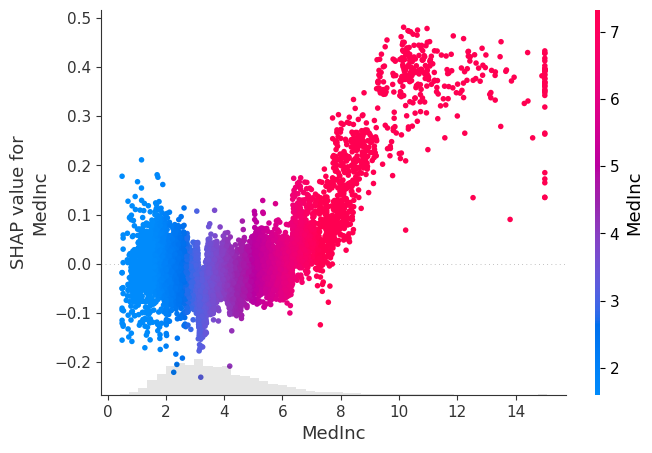

In [11]:
# Partial Dependence Plot
pdp_df = pd.DataFrame(X_train, columns=feature_names)
lgblss.plot(pdp_df,
            parameter="concentration",
            feature=feature_names[0],
            plot_type="Partial_Dependence")

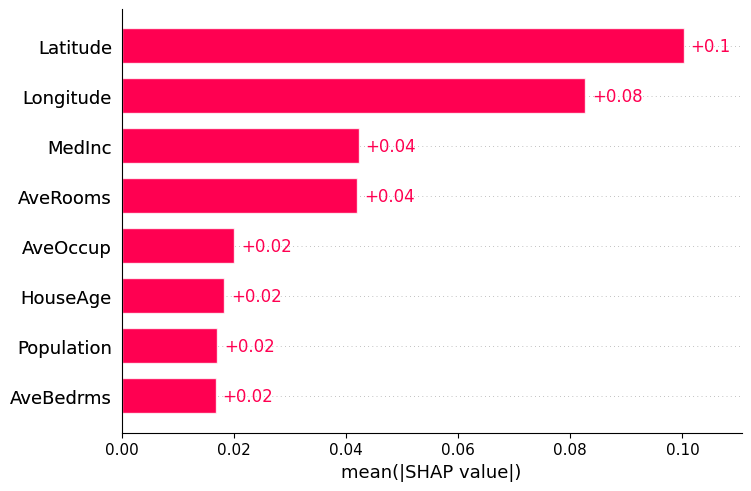

In [12]:
# Feature Importance
lgblss.plot(pdp_df,
            parameter="concentration",
            plot_type="Feature_Importance")